Task-4
 MACHINE LEARNING MODEL IMPLEMENTATION

In [1]:
# Imports
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Download Stopwords Package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from google.colab import files
uploaded=files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [9]:
# Load Data

df = pd.read_csv("spam_ham_dataset.csv")

# Clean Data
df = df.rename(columns={"label_num":"spam"})
df = df[["spam","text"]]
df

,spam,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,0,Subject: put the 10 on the ft\r\nthe transport...
5167,0,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,0,Subject: calpine daily gas nomination\r\n>\r\n...
5169,0,Subject: industrial worksheets for august 2000...


In [10]:
print("--------DF info--------")
# Print df Info
df.info()
print("-----------------------")

# Print OG Shape
og_rows = df.shape[0]
print("\nOriginal Shape:",df.shape)

# Drop Duplicates
df.drop_duplicates(inplace=True)

# Print Cleaned Shape
cleaned_rows = df.shape[0]
print("Cleaned Shape:",df.shape)

# Print number of rows dropped
difference = og_rows - cleaned_rows
print(f"\nDropped {difference} duplicated rows\n")

# Show amount of missing data for each column
print("Missing Data:",end="")
df.isnull().sum()

--------DF info--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5171 non-null   int64 
 1   text    5171 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.9+ KB
-----------------------

Original Shape: (5171, 2)
Cleaned Shape: (4993, 2)

Dropped 178 duplicated rows

Missing Data:

,0
spam,0
text,0


In [11]:
# Function to process text
def process_text(text):
    '''
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of cleaned text words
    '''

    # 1. Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # 2 Remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    # 3. Return list of cleaned text words
    return clean_words

In [12]:
# Show the tokenization (a list of tokens also called lemmas)
df['text'].head().apply(process_text)

,text
0,"[Subject, enron, methanol, meter, 988291, foll..."
1,"[Subject, hpl, nom, january, 9, 2001, see, att..."
2,"[Subject, neon, retreat, ho, ho, ho, around, w..."
3,"[Subject, photoshop, windows, office, cheap, m..."
4,"[Subject, indian, springs, deal, book, teco, p..."


In [13]:
# Example
message1 = "hello world hello hello world play"
message2 = "test test test one test hello"
print(message1, end="\n\n")

# Convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message1], [message2]])
print(bow4, end="\n\n")
print("bow4 shape:",bow4.shape)

hello world hello hello world play

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	4
  (1, 1)	1

bow4 shape: (2, 5)


In [14]:
# Convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer = process_text).fit_transform(df['text'])

In [15]:
# Split data into 80% training / 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size=0.20, random_state = 0)

In [16]:
# Display shape of messages_bow
print("messages_bow shape:", messages_bow.shape, end="")

messages_bow shape: (4993, 50381)

In [17]:
# Create and Train Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

Predictions: [1 0 1 ... 0 0 1]

Y Train Values: [1 0 1 ... 0 0 1]

		Classifcation Report (y-train ~ pred)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2809
           1       0.98      0.99      0.99      1185

    accuracy                           0.99      3994
   macro avg       0.99      0.99      0.99      3994
weighted avg       0.99      0.99      0.99      3994

Accuracy: 0.9912368552829244

Confusion Matrix:
 [[2787   22]
 [  13 1172]]


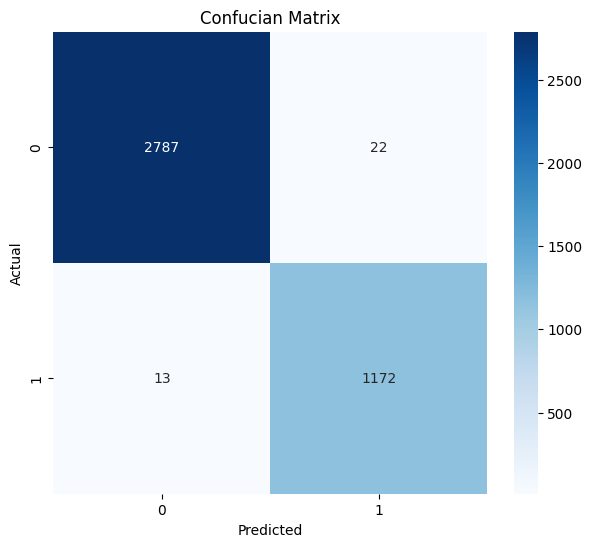

In [18]:
# Training Data Model Evaluation

# Print Predictions on Train
print("Predictions:",classifier.predict(X_train))

# Print Actual Values
print("\nY Train Values:",y_train.values)

# Evaluate model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print('\033[1m'+ "\n\t\tClassifcation Report (y-train ~ pred)" +'\033[0m')
print(classification_report(y_train, pred))

# Display Accuracy on Training Set
print("Accuracy:", accuracy_score(y_train, pred))

# Display Confusion Matrix for Training Set Predictions
print('\nConfusion Matrix:\n', confusion_matrix(y_train, pred))
sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

Predictions: [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

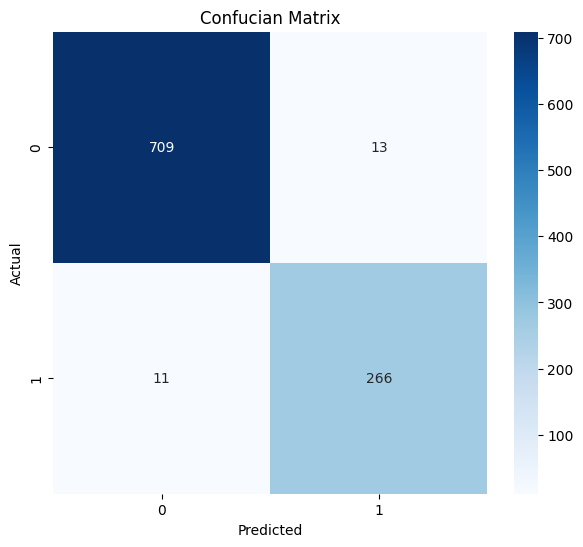

In [19]:
# Testing Data Model Evaluation

# Print Predictions on Test
print("Predictions:",classifier.predict(X_test))

# Print Actual Values
print("\nY Test Values:",y_test.values)

# Evaluate model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print('\033[1m'+ "\n\t\tClassifcation Report (y-test ~ pred)" +'\033[0m')
print(classification_report(y_test, pred))

# Display Accuracy for testing data set
print("Accuracy:", accuracy_score(y_test, pred))

# Display Confusion Matrix for testing data set
print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()